<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cleaning-&amp;-Wrangling" data-toc-modified-id="Cleaning-&amp;-Wrangling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cleaning &amp; Wrangling</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-outliers" data-toc-modified-id="Dealing-with-outliers-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dealing with outliers</a></span></li></ul></li><li><span><a href="#Setting-the-label-and-features-+-EDA" data-toc-modified-id="Setting-the-label-and-features-+-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setting the label and features + EDA</a></span><ul class="toc-item"><li><span><a href="#Numerical-features-EDA" data-toc-modified-id="Numerical-features-EDA-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Numerical features EDA</a></span></li></ul></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data pre processing</a></span><ul class="toc-item"><li><span><a href="#Applying-a-scaler-to-the-numerical-features" data-toc-modified-id="Applying-a-scaler-to-the-numerical-features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Applying a scaler to the numerical features</a></span></li><li><span><a href="#Encoding-categorical-features-using-OHE" data-toc-modified-id="Encoding-categorical-features-using-OHE-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Encoding categorical features using OHE</a></span></li><li><span><a href="#Bringing-the-dataframe-back-together" data-toc-modified-id="Bringing-the-dataframe-back-together-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Bringing the dataframe back together</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Linear-regression-model" data-toc-modified-id="Linear-regression-model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Linear regression model</a></span></li><li><span><a href="#Modeling-X" data-toc-modified-id="Modeling-X-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Modeling X</a></span><ul class="toc-item"><li><span><a href="#Train-&amp;-Test-split" data-toc-modified-id="Train-&amp;-Test-split-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Train &amp; Test split</a></span></li><li><span><a href="#Fitting-the-model-+-preds" data-toc-modified-id="Fitting-the-model-+-preds-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Fitting the model + preds</a></span></li><li><span><a href="#Model-validation" data-toc-modified-id="Model-validation-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Model validation</a></span></li></ul></li><li><span><a href="#Modeling-X_1" data-toc-modified-id="Modeling-X_1-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Modeling X_1</a></span><ul class="toc-item"><li><span><a href="#Train-&amp;-Test-split" data-toc-modified-id="Train-&amp;-Test-split-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Train &amp; Test split</a></span></li><li><span><a href="#Fitting-the-model-+-preds" data-toc-modified-id="Fitting-the-model-+-preds-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Fitting the model + preds</a></span></li><li><span><a href="#Model-validation" data-toc-modified-id="Model-validation-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Model validation</a></span></li></ul></li><li><span><a href="#Modeling-X_2" data-toc-modified-id="Modeling-X_2-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Modeling X_2</a></span><ul class="toc-item"><li><span><a href="#Train-&amp;-Test-split" data-toc-modified-id="Train-&amp;-Test-split-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Train &amp; Test split</a></span></li><li><span><a href="#Fitting-the-model-+-preds" data-toc-modified-id="Fitting-the-model-+-preds-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Fitting the model + preds</a></span></li><li><span><a href="#Model-validation" data-toc-modified-id="Model-validation-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Model validation</a></span></li></ul></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

In [1]:
# Importing the tools we will be using
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import Image
%matplotlib inline

# Loading the dataset into a pandas DataFrame
df = pd.read_csv('data/marketing_customer_analysis_round4.csv')

# Cleaning & Wrangling

The dataframe has already suffered the following transformations in past customer analysis rounds:
* Header names are standardized
* NaN values are dealt with. For numerical variables, they have been replaced with the column's median, and for categorical ones, with the value 'Unknown'.
* Further manipulations will be performed when conducting EDA.

## Dealing with outliers

One more cleaning step we need to take is checking for and eliminating outliers. About 800 records are lost, but this might help improve the model's accuracy.

In [2]:
from scipy import stats
num_cols = list(df.select_dtypes(include=np.number).columns)
df_no_outliers = df[(np.abs(stats.zscore(df[num_cols])) < 3).all(axis=1)]
df_no_outliers.reset_index(drop=True, inplace=True)

# Setting the label and features + EDA

In [3]:
y = df_no_outliers['total_claim_amount']
y_1 = df['total_claim_amount']
X = df_no_outliers.drop(['total_claim_amount'], axis=1)
X_1 = df.drop(['total_claim_amount'], axis=1)

We'll be dropping the columns customer, since it's only an ID code, and effective_to_date, as it may overlap with months_since_policy_inception, which is more informative and straightforward in expressing the seniority of the policy.

In [4]:
X = X.drop(['customer', 'effective_to_date', 'month'], axis=1)
X_1 = X_1.drop(['customer', 'effective_to_date', 'month'], axis=1)
X_2 = X.drop(['number_of_policies', 'number_of_open_complaints', 
              'months_since_policy_inception', 'months_since_last_claim'], axis=1)


Now we'll separate the categorical and numerical features so we can apply different treatments.

In [5]:
X_num = X.select_dtypes(include=np.number)
X_1_num = X_1.select_dtypes(include=np.number)
X_2_num = X_2.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include=object)
X_1_cat = X_1.select_dtypes(include=object)

## Numerical features EDA

First, we'll check multicollinearity for the numerical features.

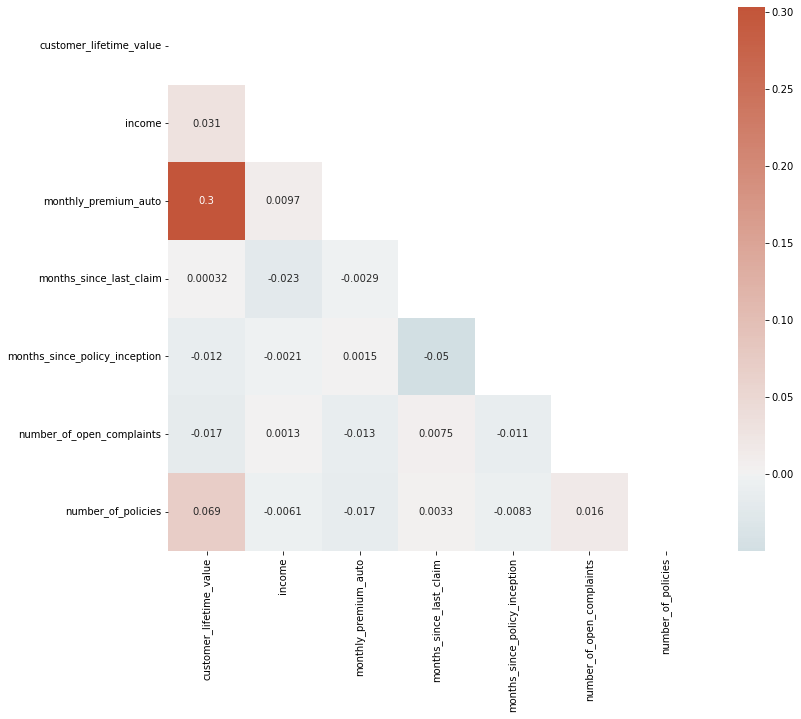

In [6]:
correlations_matrix = X_num.corr()
mask=np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)]=True
fig, ax = plt.subplots(figsize=(12,10))
ax=sns.heatmap(correlations_matrix, mask=mask, annot=True, center=0, 
               cmap=sns.diverging_palette(220, 20, as_cmap=True));

The only moderate correlation that can be found is between monthly_premium_auto and customer_lifetime_value. Nevertheless, since none of them correlate significantly with any other values and they appear to be quite meaningful, I'll keep them both.

For the categorical features, we'll explore the unique values the have.

In [7]:
for col in list(X_cat.columns):
    unique = list(X_cat[col].unique())
    print(f'{col}: {unique}')

state: ['Arizona', 'California', 'Washington', 'Oregon', 'Unknown', 'Nevada']
response: ['No', 'Yes', 'Unknown']
coverage: ['Basic', 'Extended', 'Premium']
education: ['College', 'Bachelor', 'High School or Below', 'Doctor', 'Master']
employmentstatus: ['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired']
gender: ['M', 'F']
location_code: ['Suburban', 'Urban', 'Rural']
marital_status: ['Married', 'Single', 'Divorced']
policy_type: ['Corporate Auto', 'Personal Auto', 'Special Auto']
policy: ['Corporate L3', 'Personal L3', 'Personal L2', 'Corporate L2', 'Personal L1', 'Special L1', 'Corporate L1', 'Special L3', 'Special L2']
renew_offer_type: ['Offer3', 'Offer4', 'Offer2', 'Offer1']
sales_channel: ['Agent', 'Call Center', 'Branch', 'Web']
vehicle_class: ['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car', 'Unknown', 'Luxury SUV']
vehicle_size: ['Medsize', 'Small', 'Large', 'Unknown']


# Data pre processing

## Applying a scaler to the numerical features

First, we will check for normality in our distributions via multiple histogram plot.

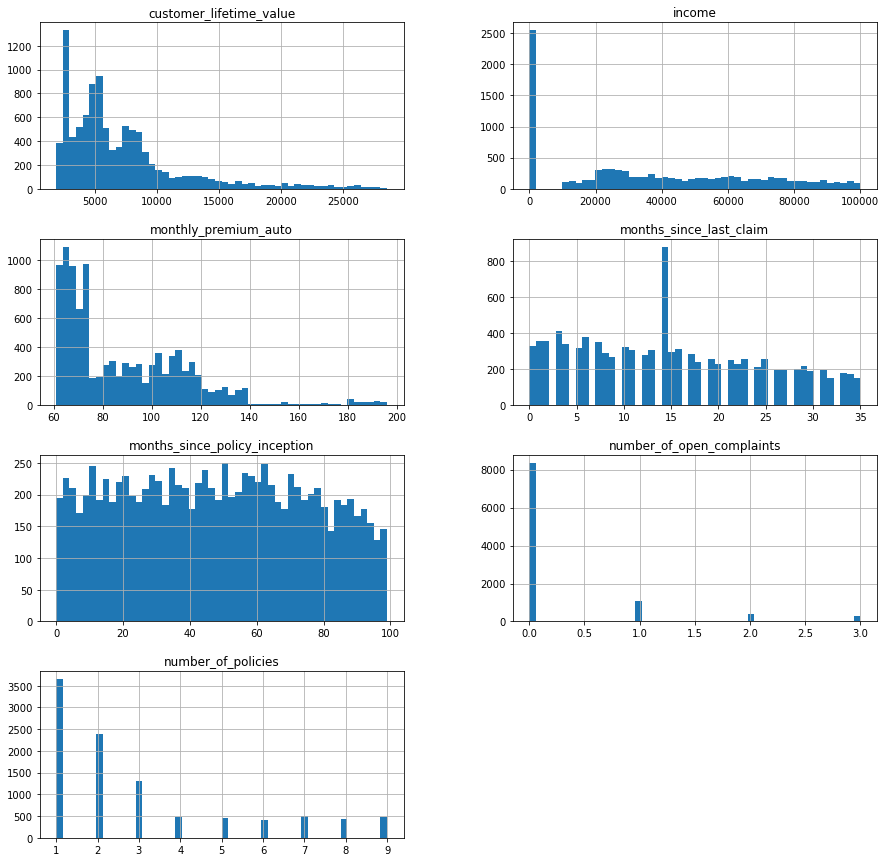

In [8]:
X_num.hist(figsize=(15, 15), bins=50, layout=(4, 2));

Distributions seem heavily skewed to the right at best, uniform at worst, so we will be applying a scaler (Normalizer) to try to normalize them. Also, some of the numerical features clearly need some transforming to categories (e.g. number_of_policies, number_of_open_complaints).

In [9]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaled = scaler.fit(X_num)
scaled_X_num = pd.DataFrame(scaled.transform(X_num))
# Candidate model 2
scaled_1 = scaler.fit(X_1_num)
scaled_X_1_num = pd.DataFrame(scaled_1.transform(X_1_num))
# Candidate model 3
scaled_2 = scaler.fit(X_2_num)
scaled_X_2_num = pd.DataFrame(scaled_2.transform(X_2_num))

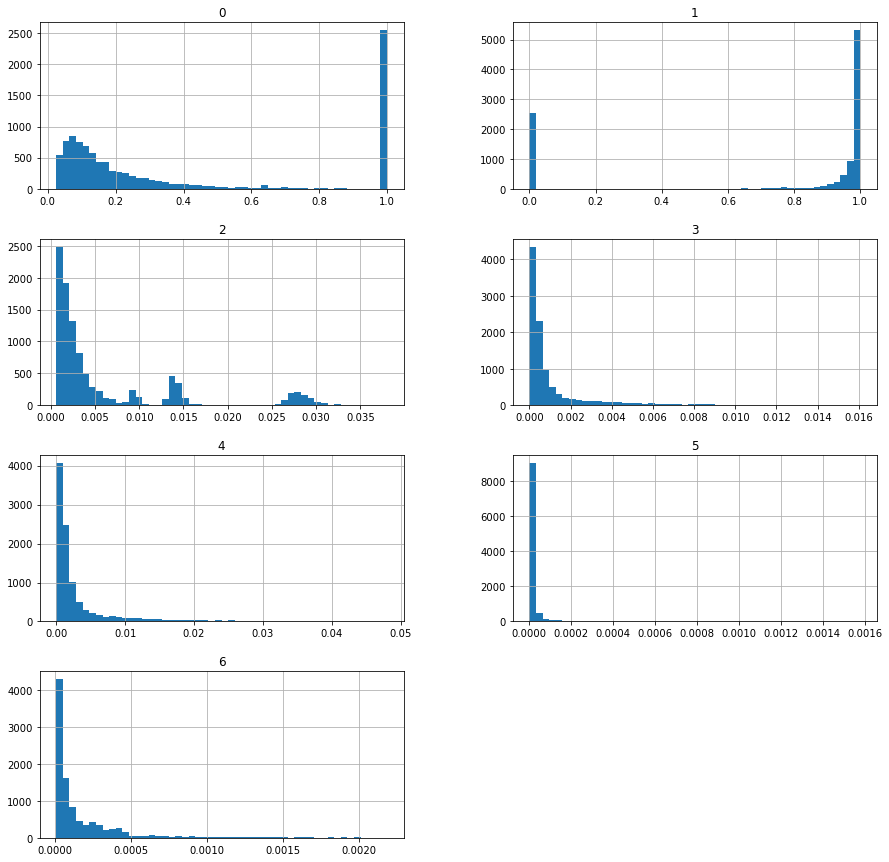

In [10]:
scaled_X_num.hist(figsize=(15, 15), bins=50, layout=(4, 2));

(Kind of) Better now!

## Encoding categorical features using OHE

Now it's time to encode the categorical features of our model to convert them into numerical values. We will be using OneHotEncoder for that.

In [11]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10121 entries, 0 to 10120
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             10121 non-null  object
 1   response          10121 non-null  object
 2   coverage          10121 non-null  object
 3   education         10121 non-null  object
 4   employmentstatus  10121 non-null  object
 5   gender            10121 non-null  object
 6   location_code     10121 non-null  object
 7   marital_status    10121 non-null  object
 8   policy_type       10121 non-null  object
 9   policy            10121 non-null  object
 10  renew_offer_type  10121 non-null  object
 11  sales_channel     10121 non-null  object
 12  vehicle_class     10121 non-null  object
 13  vehicle_size      10121 non-null  object
dtypes: object(14)
memory usage: 1.1+ MB


In [12]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
X_cat_encoded = pd.DataFrame(encoder.transform(X_cat).toarray())
# Candidate model 2
encoder_1 = OneHotEncoder(handle_unknown='error', drop='first').fit(X_1_cat)
X_1_cat_encoded = pd.DataFrame(encoder_1.transform(X_1_cat).toarray())

## Bringing the dataframe back together

Now that we have everything transformed as we wished, it's time to add the index columns back and concat() our dataframes into one. This will be done for every candidate model.

In [13]:
X_final = pd.concat((scaled_X_num, X_cat_encoded), axis=1)

In [14]:
X_final_1 = pd.concat((scaled_X_1_num, X_1_cat_encoded), axis=1)

In [15]:
X_final_2 = pd.concat((scaled_X_2_num, X_cat_encoded), axis=1)

# Modeling

- **Iteration 1 (X)**

This model has had removed its outliers and the columns 'customer' and 'effective_to_date'. Also, a Normalizer scaler has been applied to the numerical features, and the categorical ones have been encoded using OHE.

- **Iteration 2 (X_1)**

This candidate model will be the same as the first one, except it includes the outliers.

- **Iteration 3 (X_2)**

This candidate model will keep the outliers removed, since their inclusion did not increase the model's precision, and will have the columns 'number_of_policies', 'number_of_open_complaints', 'months_since_policy_inception' and 'months_since_last_claim' removed. This last decision is based on the heatmap below: all of these variables barely correlate with out label, and thus might introduce noise in the model. 

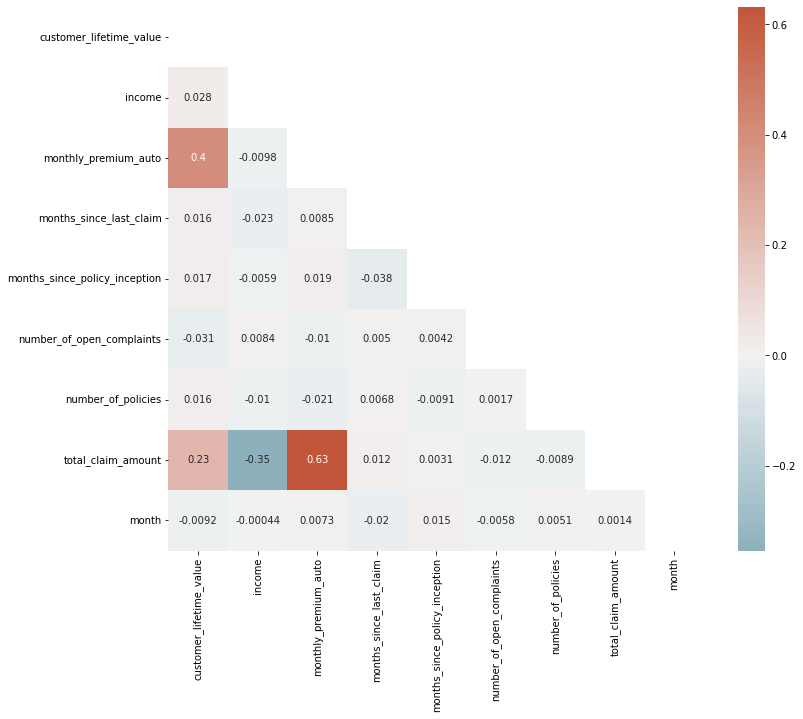

In [16]:
mask=np.zeros_like(df.select_dtypes(include=np.number).corr())
mask[np.triu_indices_from(mask)]=True
fig, ax = plt.subplots(figsize=(12,10))
ax=sns.heatmap(df.select_dtypes(include=np.number).corr(), mask=mask, annot=True, center=0, 
               cmap=sns.diverging_palette(220, 20, as_cmap=True));

## Linear regression model

First, we're creating our simple linear regression model.

In [17]:
lm = linear_model.LinearRegression()

## Modeling X

### Train & Test split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_final, y, test_size=0.2, random_state=40)

### Fitting the model + preds

In [19]:
model = lm.fit(X_train, y_train)
preds = lm.predict(X_test)

### Model validation

In [20]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
print(f'R2 = {r2_score(y_test, preds)}')
print(f'RMSE = {sqrt(mean_squared_error(y_test, preds))}')
print(f'MAE = {mean_absolute_error(y_test, preds)}')

R2 = 0.7377001388298431
RMSE = 120.33115472516255
MAE = 87.77212011879158


## Modeling X_1

### Train & Test split

In [21]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_final_1, y_1, test_size=0.2, random_state=40)

### Fitting the model + preds

In [22]:
model_1 = lm.fit(X_train_1, y_train_1)
preds_1 = lm.predict(X_test_1)

### Model validation

In [23]:
print(f'R2 = {r2_score(y_test_1, preds_1)}')
print(f'RMSE = {sqrt(mean_squared_error(y_test_1, preds_1))}')
print(f'MAE = {mean_absolute_error(y_test_1, preds_1)}')

R2 = 0.7332917148526856
RMSE = 151.09660035659897
MAE = 99.74726733745719


## Modeling X_2

### Train & Test split

In [24]:
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X_final_2, y, test_size=0.2, random_state=40)

### Fitting the model + preds

In [25]:
model_2 = lm.fit(X_train_2, y_train_2)
preds_2 = lm.predict(X_test_2)

### Model validation

In [26]:
print(f'R2 = {r2_score(y_test_2, preds_2)}')
print(f'RMSE = {sqrt(mean_squared_error(y_test_2, preds_2))}')
print(f'MAE = {mean_absolute_error(y_test_2, preds_2)}')

R2 = 0.7348068682040614
RMSE = 120.99298464947209
MAE = 88.01873990918254


# Conclusions

The best performing model, based on their indicators, is actually the base model (candidate model 1), with an explained variance of roughly 77% and a mean average error (MAE) of 87.7. Therefore, this model allows us to predict the total claimed amount of a certain customer (as long as its features are similar to the ones in our sample) within a margin of 87.7$.
Other insights, albeit not very promising, are that a lot of relevant data is missing, and most of the available one barely correlates with the set label.